## 4. Inference

#### A360 MDK interface

In [1]:
a360ai

<A360 AI Interface for project: Product Demand Forecasting>

In [2]:
# Get default data repo
DATAREPO_LIST = a360ai.list_datarepos()
DATAREPO = DATAREPO_LIST['name'][0]
DATAREPO

'Product Demand Forecasting'

In [3]:
import requests
import json

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### 1. Set Default Data Repo and load data

In [4]:
a360ai.set_default_datarepo(DATAREPO)

In [5]:
a360ai.list_datasets()

,base_name,extension,size
1,X.csv,csv,97672.0
2,X.parquet,parquet,20323.0
3,product-demand-2015-2020-a.csv,csv,44133.0
4,rf_model.pkl,pkl,11465124.0
5,y.csv,csv,10765.0
6,y.parquet,parquet,5080.0


In [6]:
df = a360ai.load_dataset("product-demand-2015-2020-a.csv")

In [7]:
df_covid = df.loc[1825:]
df_covid = df_covid.reset_index(drop=True)

In [8]:
X = a360ai.load_dataset("X.csv")
y = a360ai.load_dataset("y.csv")

In [9]:
df_X_val = X.loc[1734:1824]
df_y_val = y['sales'][1734:1825]
df_X_val = df_X_val.reset_index(drop=True)
df_y_val = df_y_val.reset_index(drop=True)

In [10]:
df_X_covid = X.loc[1825:]
df_y_covid = y['sales'][1825:]
df_X_covid = df_X_covid.reset_index(drop=True)
df_y_covid = df_y_covid.reset_index(drop=True)

### 2. Test endpoint with one data point 

In [10]:
data = df_X_val.iloc[0]
out = data.to_json() 

In [11]:
out

'{"trend-index":48.0,"day_of_month":1.0,"day_of_year":274.0,"week_of_year":40.0,"year":2019.0,"is_wknd":0.0,"is_month_start":1.0,"is_month_end":0.0,"month_1":0.0,"month_2":0.0,"month_3":0.0,"month_4":0.0,"month_5":0.0,"month_6":0.0,"month_7":0.0,"month_8":0.0,"month_9":0.0,"month_10":1.0,"month_11":0.0,"month_12":0.0}'

In [12]:
url = "https://ms-demo.a360.ai/product-demand-forec-demand-forecast-demo-6-9-1/"
with open('header.json') as json_file:
    headers = json.load(json_file)

In [13]:
prediction = requests.post(url,data=out,headers=headers).text.split(':')[-1].split("}")[0]
prediction

'55.332393646240234'

### 3. Test data outlier/ anomaly 

In [14]:
data = {"trend-index":4800.0, #<---
        "day_of_month":1.000,
        "day_of_year":274.000,
        "week_of_year":40.000,
        "year":2019.000,
        "is_wknd":0.000,
        "is_month_start":1.000,
        "is_month_end":0.000,
        "month_1":0.000,
        "month_2":0.000,
        "month_3":0.000,
        "month_4":0.000,
        "month_5":0.000,
        "month_6":0.000,
        "month_7":0.000,
        "month_8":0.000,
        "month_9":0.000,
        "month_10":1.000,
        "month_11":0.000,
        "month_12":0.000}

In [15]:
data = json.dumps(data,indent=2)

In [16]:
prediction = requests.post(url,data=data,headers=headers).text.split(':')[-1].split("}")[0]
prediction

'55.218448638916016'

### 4. Test data and concept drift 

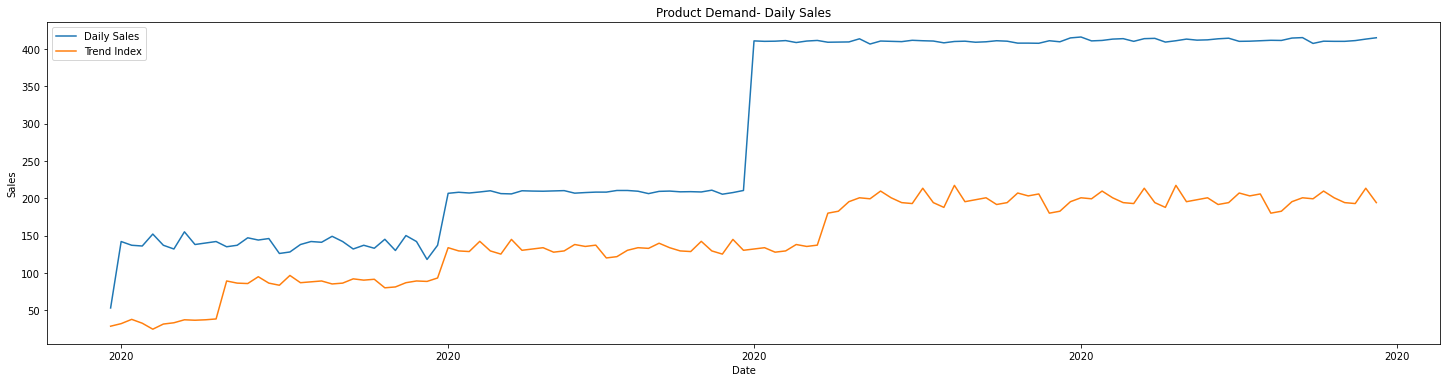

In [17]:
locator = mdates.MonthLocator()

fig = plt.figure(figsize=(20, 5))
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
plt.plot(df_covid['date'], df_covid['sales'], label='Daily Sales')
plt.plot(df_covid['date'], df_covid['trend-index'], label='Trend Index')
plt.tight_layout()
plt.title('Product Demand- Daily Sales')
plt.xlabel('Date')
plt.ylabel("Sales")
plt.legend()
plt.show()

In [18]:
data_drift = df_X_covid

In [19]:
data_drift['day_of_year'] = data_drift['day_of_year']*2

In [20]:
data_drift

,trend-index,day_of_month,day_of_year,week_of_year,year,is_wknd,is_month_start,is_month_end,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,28.56,31,730,1,2019,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,32.00,1,2,1,2020,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,37.72,2,4,1,2020,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,32.56,3,6,1,2020,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,24.56,4,8,1,2020,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,200.61,25,232,17,2020,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
117,194.13,26,234,17,2020,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
118,192.87,27,236,18,2020,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
119,213.39,28,238,18,2020,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [21]:
for i in range(0, data_drift.shape[0]):
    data = data_drift.iloc[i]
    out = data.to_json() 
    prediction = requests.post(url,data=out,headers=headers).text.split(':')[-1].split("}")[0]
    print(prediction)

41.015926361083984
37.57156753540039
35.7005615234375
36.756134033203125
37.493736267089844
36.91287612915039
37.2991943359375
35.567893981933594
36.60954666137695
35.329368591308594
34.92499923706055
34.92499923706055
34.90447235107422
35.11140441894531
35.19711685180664
35.12502670288086
35.05935287475586
36.72284698486328
38.415985107421875
38.57356643676758
39.32984161376953
39.54672622680664
39.45134735107422
39.35078811645508
39.20981216430664
40.27384948730469
40.56279754638672
40.638885498046875
40.65088653564453
40.58724594116211
42.59170150756836
45.39776611328125
47.14860153198242
47.50193405151367
48.20563888549805
48.279483795166016
48.67313766479492
48.72288131713867
48.21633529663086
48.286197662353516
48.27113723754883
48.42703628540039
48.41384506225586
48.4297981262207
48.425960540771484
50.30916213989258
57.64055633544922
58.48451232910156
59.306129455566406
59.423484802246094
59.37594223022461
59.34737777709961
58.58243942260742
58.476192474365234
58.476192474365234